<a href="https://github.com/E-CG/AI4ENG/blob/master/01%20-%20Exploracion%20de%20datos.ipynb" target="_parent"> <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/> </a>

# **📦 Módulos, archivos, paquetes importantes para la ejecución del notebook.**

In [ ]:
! pip install py7zr
! pip install squarify

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Instrucciones para utilizar kaggle.json:
1. Identifica la dirección '/content/drive/MyDrive/Modelos_I/credentials_kaggle/kaggle.json'
2. Cambia la dirección por la URL dónde tengas tus credenciales de kaggle.

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle
# Aquí debes cambiar la dirección donde tengas tus credenciales de Kaggle
! cp /content/drive/MyDrive/Modelos_I/credentials_kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download favorita-grocery-sales-forecasting
! unzip favorita-grocery-sales-forecasting.zip

In [ ]:
# Librerias uso básico
import numpy as np
import pandas as pd
import math as m
import time
import py7zr
import os
from subprocess import check_output

# Librerias preprocesado
from mlxtend.preprocessing import minmax_scaling

# Librerias para gráficar
import seaborn as sns
color = sns.color_palette()
import squarify
import matplotlib.pyplot as plt

# Funciones de sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Extrayendos y visualizando los archivos .csv ⏭️❗

In [ ]:
# Ruta al archivo 7z en Google Drive
sevenzip_file_path = '/content'

# Directorio de destino para la extracción
extracted_dir = '/content/extracted_data/'

# Crear el directorio de destino si no existe
os.makedirs(extracted_dir, exist_ok=True)

# Listar los archivos .7z en el directorio de entrada
files_to_extract = [file for file in os.listdir(sevenzip_file_path) if file.endswith('.7z')]

# Iterar a través de los archivos y descomprimirlos
for file_to_extract in files_to_extract:
    with py7zr.SevenZipFile(os.path.join(sevenzip_file_path, file_to_extract), mode='r') as z:
        z.extractall(path=extracted_dir)

Cargando archivos para trabajar con ellos

In [ ]:
test = pd.read_csv('/content/extracted_data/test.csv', usecols=[1, 2, 3, 4], parse_dates=["date"])
stores = pd.read_csv('/content/extracted_data/stores.csv')
items = pd.read_csv('/content/extracted_data/items.csv')
holidays_e = pd.read_csv('/content/extracted_data/holidays_events.csv', parse_dates=["date"])
transactions = pd.read_csv('/content/extracted_data/transactions.csv', parse_dates=["date"])
print('Archivos cargados 🗞️✅')

Archivos cargados 🗞️✅


In [ ]:
test

,date,store_nbr,item_nbr,onpromotion
0,2017-08-16,1,96995,False
1,2017-08-16,1,99197,False
2,2017-08-16,1,103501,False
3,2017-08-16,1,103520,False
4,2017-08-16,1,103665,False
...,...,...,...,...
3370459,2017-08-31,54,2132163,False
3370460,2017-08-31,54,2132318,False
3370461,2017-08-31,54,2132945,False
3370462,2017-08-31,54,2132957,False


In [ ]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [ ]:
items

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [ ]:
holidays_e

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


Los datos de entrenamiento se leen por pedazos de 20000 datos porque el conjunto de datos es muy grande. Dividir en trozos más pequeños el dataset es más eficiente en términos de tiempo. 🔬👁️

In [ ]:
# Cargar el archivo CSV en chunks
chunked_dfs = pd.read_csv("/content/extracted_data/train.csv",
                          chunksize=20000,
                          usecols=[1, 2, 3, 4, 5],
                          parse_dates=['date'],
                          low_memory=False)

# Inicializar una lista para almacenar los DataFrames filtrados
datos_filtrados = []

# Iterar a través de los chunks
for chunk in chunked_dfs:
    # Crear una máscara booleana para las fechas entre 2016 y 2017
    mask = (chunk['date'] >= '2016-01-01') & (chunk['date'] <= '2017-12-31')

    # Aplicar la máscara y agregar las filas filtradas a la lista
    trozo_filtrado = chunk[mask]
    datos_filtrados.append(trozo_filtrado)

# Concatenar los DataFrames filtrados en uno solo
train = pd.concat(datos_filtrados, ignore_index=True)

🤓📄 Por motivos prácticos solo se trabajaran con datos desde **2016-01-01** hasta **2017-12-31**. Reduciendo así el inmenso tamaño de los datos en train.csv. Paso de **125 millones** a **56 millones** de datos.

In [ ]:
train

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2016-01-01,25,105574,12.0,False
1,2016-01-01,25,105575,9.0,False
2,2016-01-01,25,105857,3.0,False
3,2016-01-01,25,108634,3.0,False
4,2016-01-01,25,108701,2.0,True
...,...,...,...,...,...
59038127,2017-08-15,54,2089339,4.0,False
59038128,2017-08-15,54,2106464,1.0,True
59038129,2017-08-15,54,2110456,192.0,False
59038130,2017-08-15,54,2113914,198.0,True


# **🕵️ Exploración de datos (stores.csv 📄)**

In [ ]:
# Primero se explican los resultados, luego los gráficos que lo soportan
stores.head(3)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


In [ ]:
#Modo oscuro
plt.style.use('dark_background')


*   Más de 40 tiendas se abrieron en el 2013.🏬
*   En 2014 y 2017 abrieron 2 tiendas en total. 🛒
*   Aproximadamente 5 tiendas se abrieron en 2015. 🏪

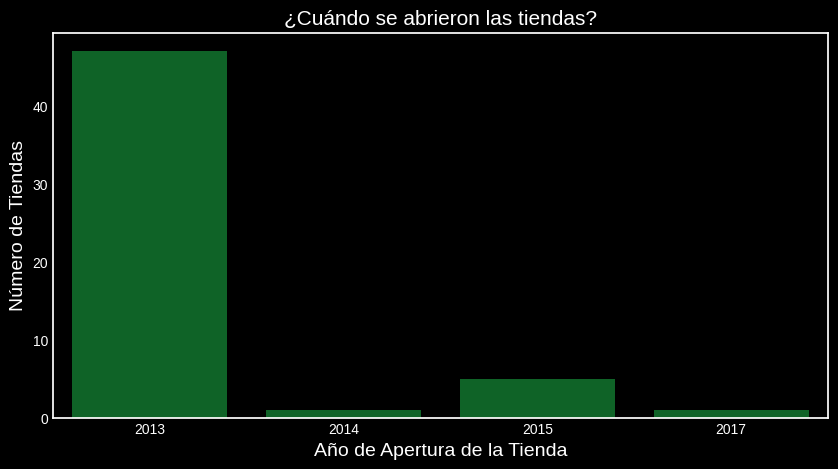

In [ ]:
'''  Filtrar las fechas desde 2016 hasta el 2017
temp = temp[(temp['date']['amin'] >= '2016-01-01') & (temp['date']['amax'] <= '2017-12-31')] '''

# Establecer el estilo de la gráfica
temp = transactions.groupby(['store_nbr']).agg({'date': [np.min, np.max]}).reset_index()

# Calcular la antigüedad de la tienda
temp['store_age'] = temp['date']['amax'] - temp['date']['amin']

# Obtener el año de apertura de la tienda
temp['open_year'] = temp['date']['amin'].dt.year

# Contar el número de tiendas abiertas en cada año
data = temp['open_year'].value_counts()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Crear un gráfico de barras
sns.barplot(x = data.index , y = data.values, alpha=0.8, color='#038E29')

# Configurar etiquetas y título
plt.ylabel('Número de Tiendas', fontsize=14)
plt.xlabel('Año de Apertura de la Tienda', fontsize=14)
plt.title('¿Cuándo se abrieron las tiendas?', fontsize=15)
plt.xticks(rotation='horizontal')

plt.show()

📊 Del mapa de árbol se puede decir que la mayoria de tiendas están en la ciudad de **Quito y Guayaquil**. Los siguientes puestos se los llevan las localidades de **Cuenca** y **Santo Domingo**.

🌐 Las tiendas están distribuidas por 22 ciudades en total.

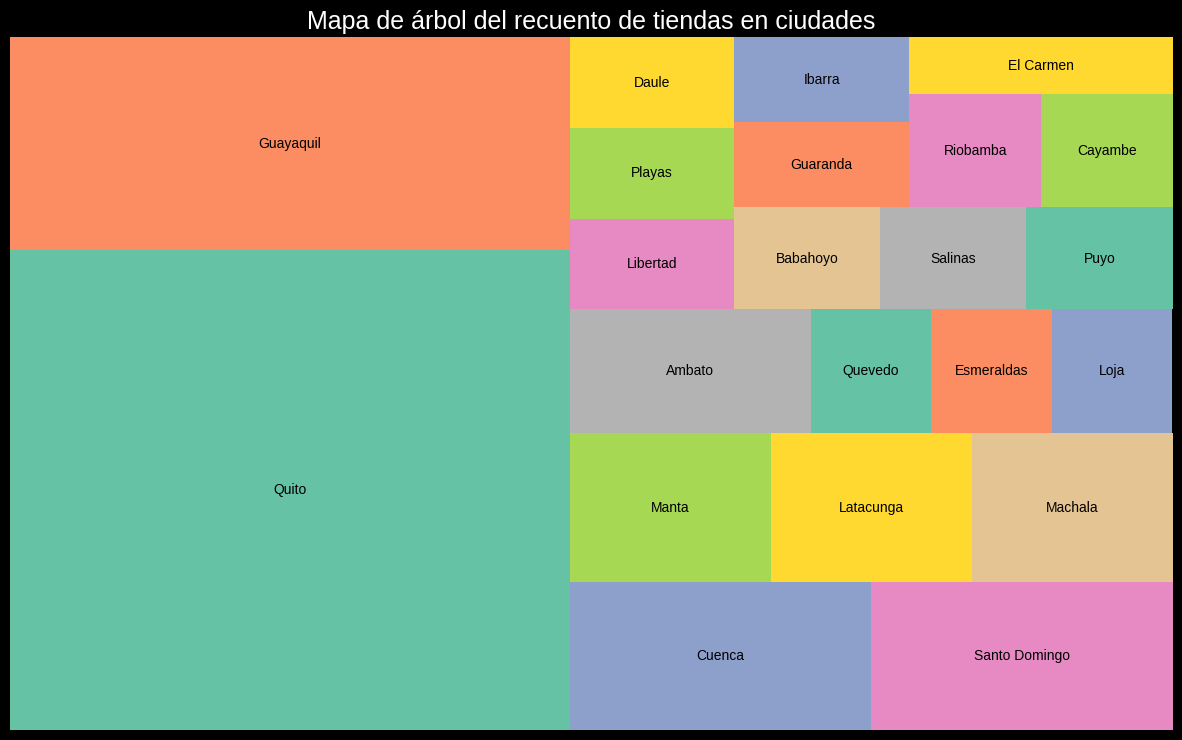

In [ ]:
# Calcular el recuento de tiendas por ciudad
city_counts = stores['city'].value_counts()

# Crear una figura
plt.figure(figsize=(15, 9))

# Crear un treemap con Squarify
text_color = 'black'
squarify.plot(sizes=city_counts.values, label=city_counts.index,
              color=sns.color_palette('Set2', len(city_counts)), alpha=1,
              text_kwargs={'color': text_color})

plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(15, 9)
plt.title("Mapa de árbol del recuento de tiendas en ciudades", fontsize=18)

plt.show()

⬇️ Estados Ecuatorianos donde están localizadas las tiendas

In [ ]:
stores.state.unique()

array(['Pichincha', 'Santo Domingo de los Tsachilas', 'Cotopaxi',
       'Chimborazo', 'Imbabura', 'Bolivar', 'Pastaza', 'Tungurahua',
       'Guayas', 'Santa Elena', 'Los Rios', 'Azuay', 'Loja', 'El Oro',
       'Esmeraldas', 'Manabi'], dtype=object)

*  🟨 La mayoría de los tipos de tiendas parecen estar clasificados en categorías, especialmente en lo que respecta al tipo de tienda "D".
*  🟧 Solo las tiendas de tipo "E" parecen pertenecer al único clúster (grupo) 10.
*  ❌ Sin embargo, en las relaciones entre los tipos de tiendas y los clústeres, parece que no hay nada evidente que resalte.
*  🤓 En mi opinión, al pensar en categorías de tiendas, consideraría clasificaciones como tiendas abiertas las 24 horas, tiendas grandes que venden desde comestibles hasta electrodomésticos o tiendas de compra a granel.

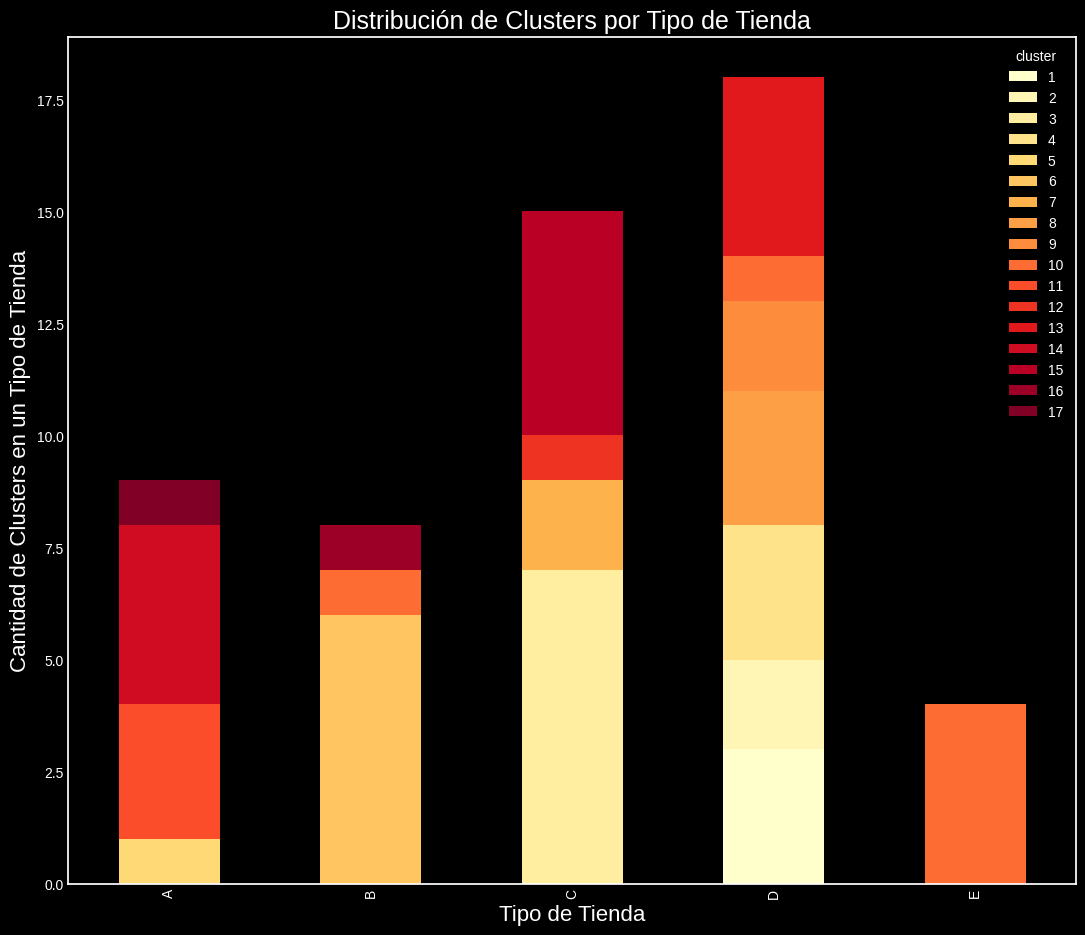

In [ ]:
# Agrupar por 'type' y 'cluster' y contar las ocurrencias
type_cluster = stores.groupby(['type', 'cluster']).size()

# Crear un gráfico de barras apiladas
ax = type_cluster.unstack().plot(kind='bar', stacked=True, colormap='YlOrRd', figsize=(13, 11), grid=False)

# Configurar el título y etiquetas de ejes
plt.title('Distribución de Clusters por Tipo de Tienda', fontsize=18)
plt.ylabel('Cantidad de Clusters en un Tipo de Tienda', fontsize=16)
plt.xlabel('Tipo de Tienda', fontsize=16)

plt.show()

# **🕵️ Exploración de datos (holiday_events.csv 📄)**

In [ ]:
holidays_e.head(3)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


El siguiente gráfico de barras apiladas para saber cuales son los tipos de eventos, y en las localidades donde se celebra ese día festivo.

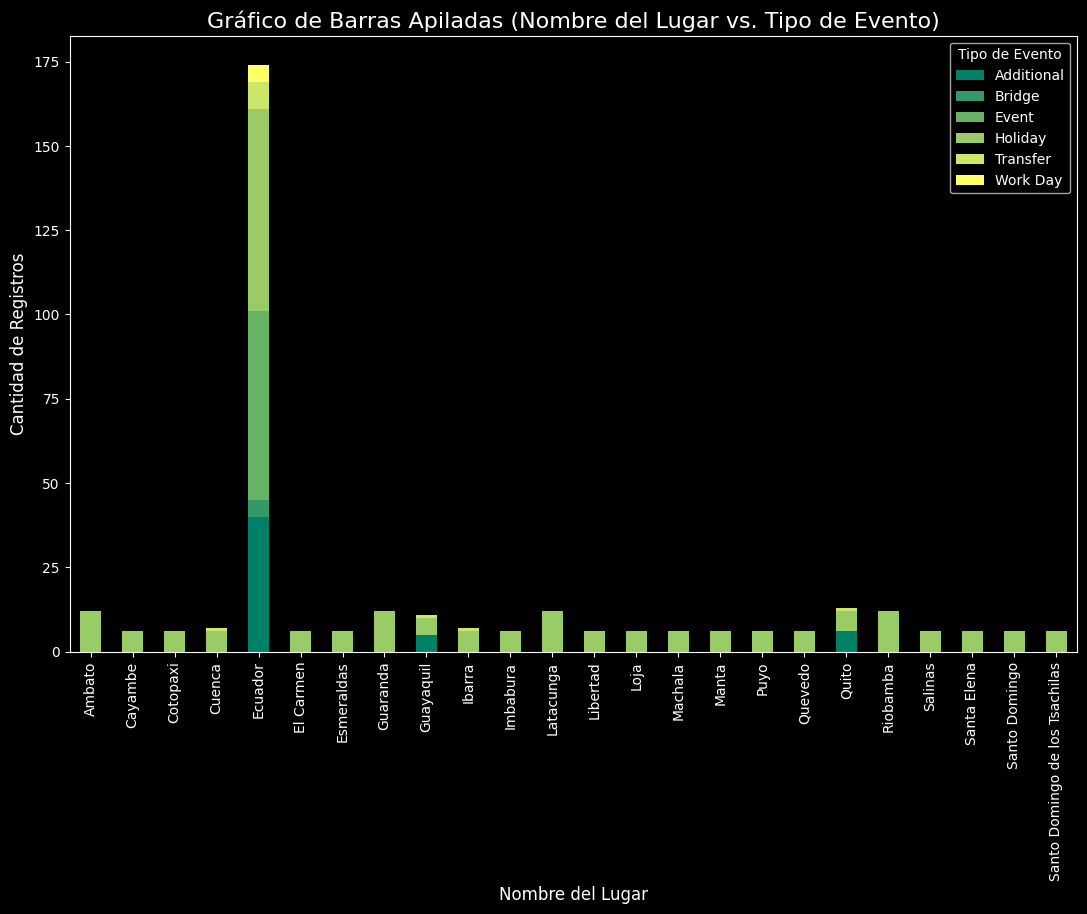

In [ ]:
# Agrupar los datos por 'locale_name' y 'type' y contar las ocurrencias
holiday_local_type = holidays_e.groupby(['locale_name', 'type']).size()

# Crear un gráfico de barras apiladas
ax = holiday_local_type.unstack().plot(kind='bar', stacked=True, colormap='summer', figsize=(13, 8), grid=False)

# Personalizar el título y etiquetas
plt.title('Gráfico de Barras Apiladas (Nombre del Lugar vs. Tipo de Evento)', fontsize=16)
plt.xlabel('Nombre del Lugar', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)

# Mostrar la leyenda
plt.legend(title='Tipo de Evento', fontsize=10)

# Mostrar la gráfica
plt.show()

- En la mayoria de localidades se celebra la navidad (holiday) por lo tanto hay un mayor registro de entradas de ese tipo.
- Los tipos de festivos son:

1.   Días festivos adicionales
2.   Puentes
3.   Eventos
4.   Navidad
5.   Día del trabajo
6.   Transfer

- La mayor cantidad de registros está en Ecuador como es evidente. Por esto es correcto decir que las tiendas ven un aumento de visitas en los días festivos.

# **🕵️ Exploración de datos (transactions.csv 📄)**

In [ ]:
transactions.head(3)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


sa

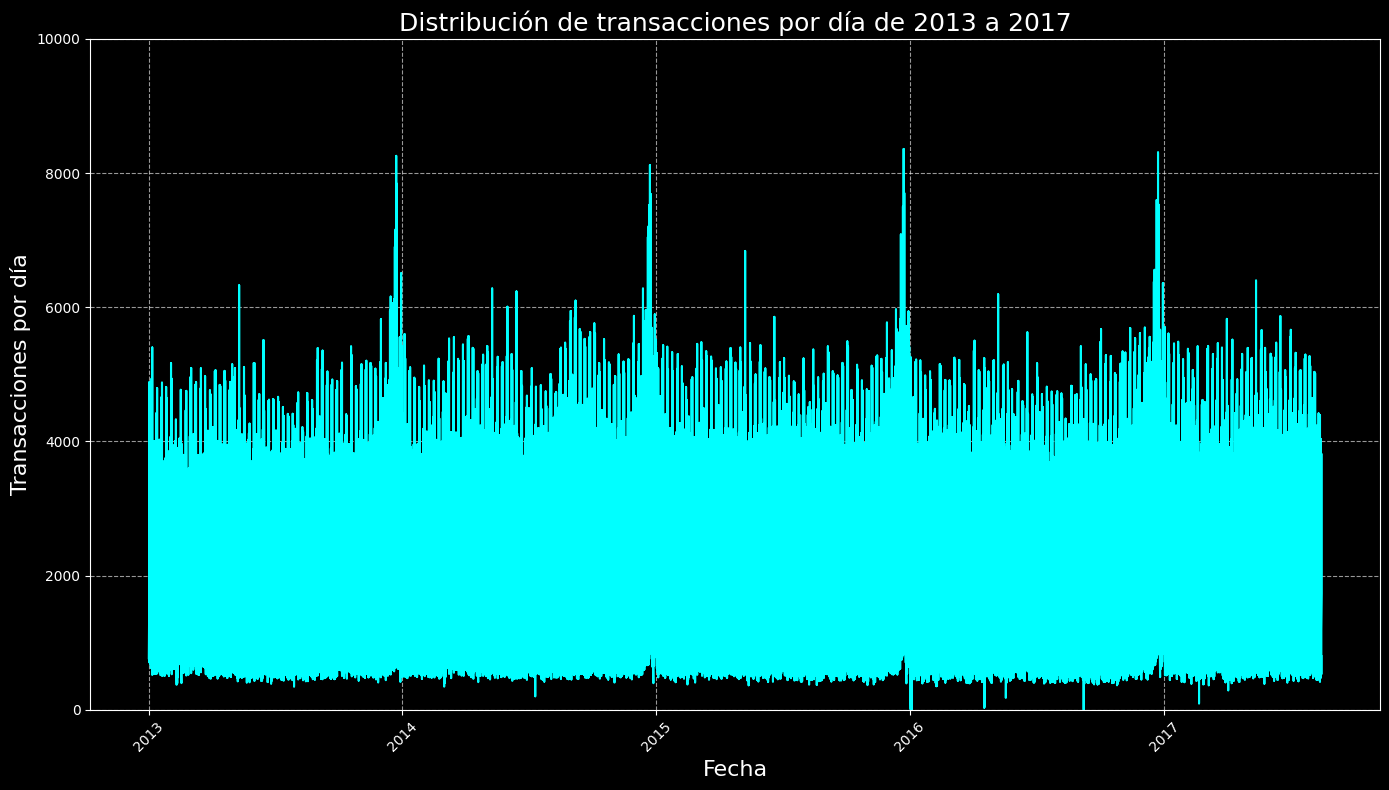

In [ ]:
# Mostrando los datos en un gráfico de líneas
plt.figure(figsize=(14, 8))
# Desde 2013 hasta el 2017
plt.plot(transactions.date.values, transactions.transactions.values, color='cyan')
plt.ylim(0, 10000)

plt.title("Distribución de transacciones por día de 2013 a 2017", fontsize=18)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Transacciones por día', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

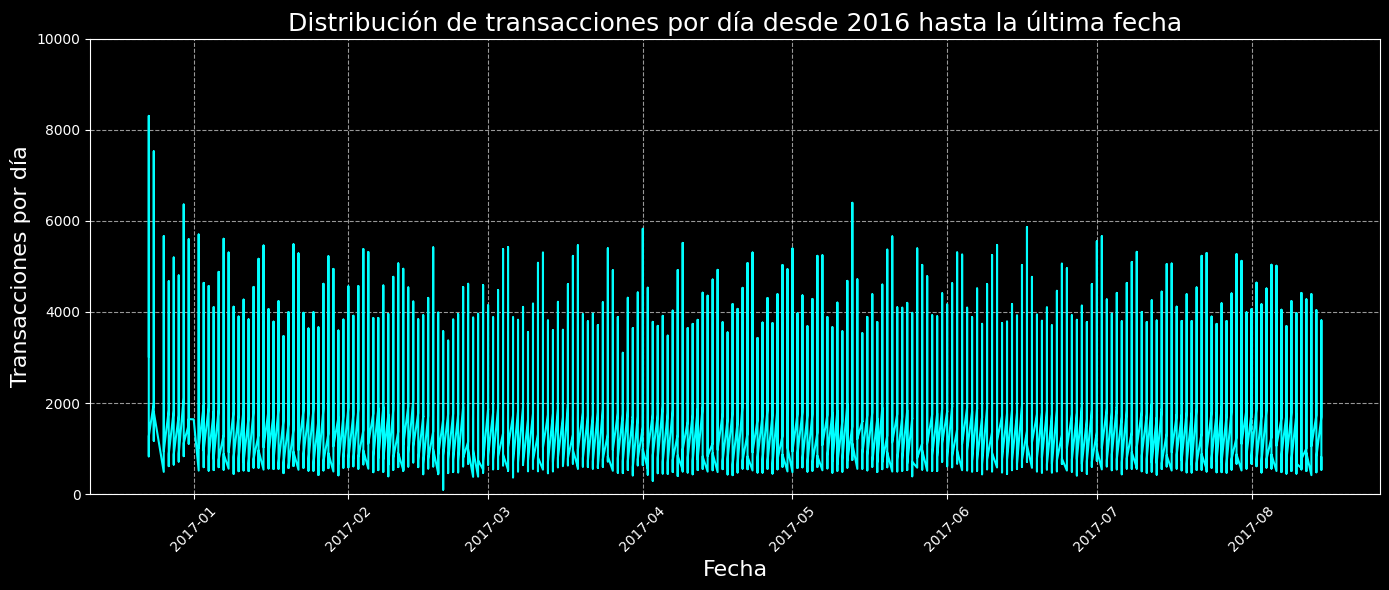

In [ ]:
# Filtrando el dataframe para incluir solo las fechas desde 2016 hasta la última fecha
fecha_filtrada = transactions[transactions.date >= '2016-12-23']

plt.figure(figsize=(14, 6))
plt.plot(fecha_filtrada.date.values, fecha_filtrada.transactions.values, color='cyan')
plt.ylim(0, 10000)

plt.title("Distribución de transacciones por día desde 2016 hasta la última fecha", fontsize=18)
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Transacciones por día', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Promedio del día anterior y día después. (Pensar si va a hacer por tienda o producto) ¿Qué voy a predicir? ¿venta unitaria de productos por tienda en x fecha? ¿Qué datos voy a usar? El laboratorio 3.2 da una visión de lo que podría hacer para rellenar los valores nulos.

# **Limpiando los diferentes archivos .csv 🧹**

In [ ]:
def count_nulls(dataframe, name_df):
  if dataframe.isnull().sum() != 0:
    print(f'')

Los modelos son evaluados en función del Error Logarítmico Cuadrado Medio Ponderado Normalizado (NWRMSLE), calculado de la siguiente manera:

$$ NWRMSLE = \sqrt{ \frac{\sum_{i=1}^n w_i \left( \ln(\hat{y}i + 1) - \ln(y_i +1)  \right)^2  }{\sum_{i=1}^n w_i}} $$

Donde para la fila i,
$\hat{y}_i$ es el valor predicho de ventas unitarias de un artículo y $y_i$ es el valor real de ventas unitarias; n es el número total de filas en el conjunto de pruebas.

Los pesos, $w_i$, se pueden encontrar en el archivo items.csv (consultar la página de Datos). Los artículos perecederos tienen un peso de 1.25, mientras que todos los demás artículos tienen un peso de 1.00.